# Multiple linear regression | 
# ............................................. V 

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [70]:
df = pd.read_csv("DataSets/FuelConsumption.csv")
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)
df.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
5,3.5,6,11.9,7.7,10.0,28,230
6,3.5,6,11.8,8.1,10.1,28,232
7,3.7,6,12.8,9.0,11.1,25,255
8,3.7,6,13.4,9.5,11.6,24,267
9,2.4,4,10.6,7.5,9.2,31,212


In [71]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


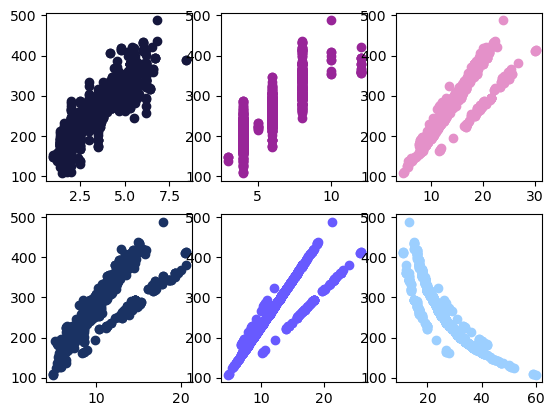

In [72]:
fig, axs = plt.subplots(2, 3)
axs[0, 0].scatter(df["ENGINESIZE"], df["CO2EMISSIONS"], color="#15173D")
axs[0, 1].scatter(df["CYLINDERS"], df["CO2EMISSIONS"], color="#982598")
axs[0, 2].scatter(df["FUELCONSUMPTION_CITY"], df["CO2EMISSIONS"], color="#E491C9")
axs[1, 0].scatter(df["FUELCONSUMPTION_HWY"], df["CO2EMISSIONS"], color="#1A3263")
axs[1, 1].scatter(df["FUELCONSUMPTION_COMB"], df["CO2EMISSIONS"], color="#685AFF")
axs[1, 2].scatter(df["FUELCONSUMPTION_COMB_MPG"], df["CO2EMISSIONS"], color="#9CCFFF");

In [73]:
X = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']]
y = df["CO2EMISSIONS"]

In [74]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
print(f"Coefficient: {model.coef_}\nIntercept: {model.intercept_}")

Coefficient: [  8.96115125   7.24023686 -13.00156667  -5.47215573  21.86697334
  -4.03446041]
Intercept: 262.5721608698734


In [76]:
y_pred = model.predict(x_test)

In [77]:
print(f"R2: {r2_score(y_test, y_pred)}\nMSR: {mean_squared_error(y_test, y_pred)}")

R2: 0.9034041224574012
MSR: 399.418688914427


## OUR MODEL IS GOOD MODEL BECAUSE R2 > 0.8

# Let's analyze our model:

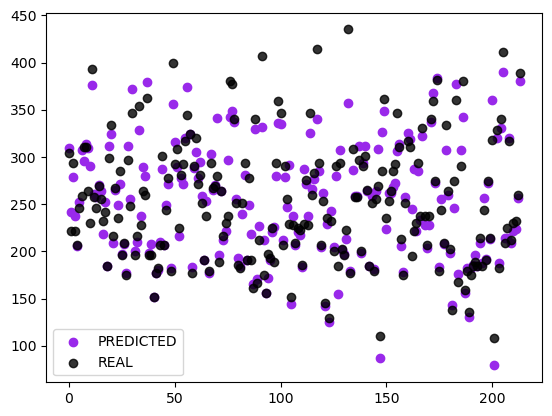

In [78]:
plt.scatter(range(len(y_test)), y_pred, color="#9929EA", label="PREDICTED")
plt.scatter(range(len(y_test)), y_test, color="#000000", alpha=0.8, label="REAL")
plt.legend()

# As observed, the predicted values are very close to the true values; therefore, the model performs well.

In [51]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [52]:
df = pd.read_csv("DataSets/china_gdp.csv")
df.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [53]:
x = df[["Year"]]
y = df[["Value"]]

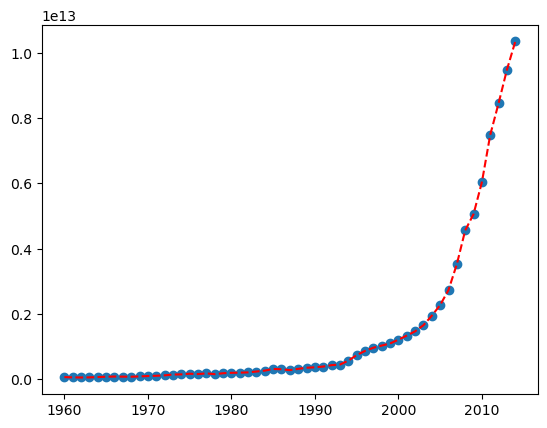

In [54]:
plt.scatter(x, y)
plt.plot(x, y, "--r");

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [58]:
y_pred = model.predict(x_test)

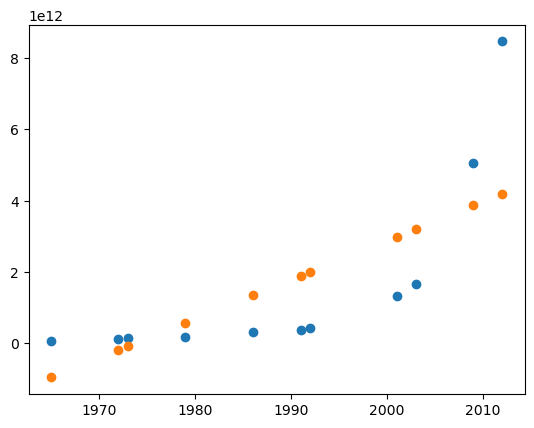

In [59]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, y_pred)

In [60]:
print(f"R2: {r2_score(y_test, y_pred)}\nMSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.557799840215933
MSE: 2.9097229920495426e+24


# BAD MODEL BECOUSE R2 = 0.55 
# R2 > 0.8 IS GOOD MODEL

In [61]:
poly = PolynomialFeatures(degree=2)
x_poly_train = poly.fit_transform(x_train)
x_poly_test = poly.transform(x_test)

In [62]:
model = LinearRegression()
model.fit(x_poly_train, y_train)

LinearRegression()

In [64]:
print(model.coef_, model.intercept_)

[[ 0.00000000e+00 -2.39999930e+13  6.06813165e+09]] [2.37298728e+16]


In [63]:
y_pred = model.predict(x_poly_test)

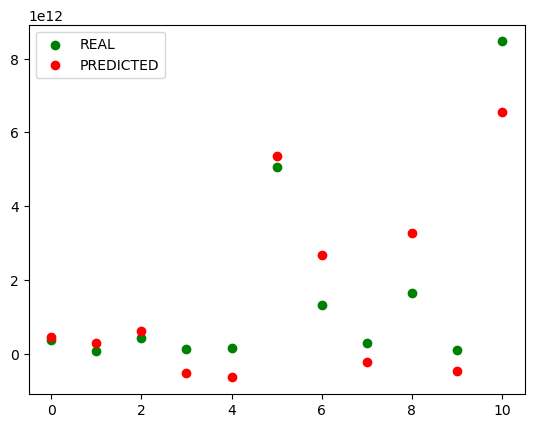

In [65]:
plt.scatter(range(len(y_test)), y_test, color="green", label="REAL")
plt.scatter(range(len(y_test)), y_pred, color="red", label="PREDICTED")
plt.legend();

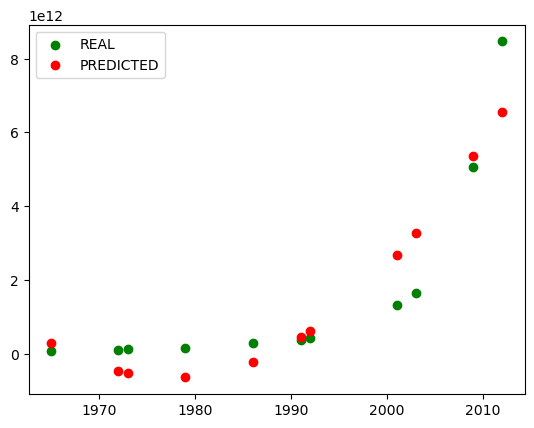

In [66]:
plt.scatter(x_test, y_test, color="green", label="REAL")
plt.scatter(x_test, y_pred, color="red", label="PREDICTED")
plt.legend();

In [67]:
print(f"R2: {r2_score(y_test, y_pred)},\nMSE: {mean_squared_error(y_test, y_pred)}")

R2: 0.8615852270181502,
MSE: 9.107835862865231e+23


# THIS IS GOOD MODEL BECOUSE R2 > 0.8